# Malaria Detection

This is a malaria detection approach using Keras for CNN

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.
* In 2017, there were an estimated 219 million cases of malaria in 90 countries.
* Malaria deaths reached 435 000 in 2017.
* The WHO African Region carries a disproportionately high share of the global malaria burden. In 2017, the region was home to 92% of malaria cases and 93% of malaria deaths.

Malaria is caused by Plasmodium parasites. The parasites are spread to people through the bites of infected female Anopheles mosquitoes, called "malaria vectors." There are 5 parasite species that cause malaria in humans, and 2 of these species – P. falciparum and P. vivax – pose the greatest threat.


***Diagnosis of malaria can be difficult***:

* Where malaria is not endemic any more (such as in the United States), health-care providers may not be familiar with the disease. Clinicians seeing a malaria patient may forget to consider malaria among the potential diagnoses and not order the needed diagnostic tests. Laboratorians may lack experience with malaria and fail to detect parasites when examining blood smears under the microscope.
* Malaria is an acute febrile illness. In a non-immune individual, symptoms usually appear 10–15 days after the infective mosquito bite. The first symptoms – fever, headache, and chills – may be mild and difficult to recognize as malaria. If not treated within 24 hours, P. falciparum malaria can progress to severe illness, often leading to death.

***Microscopic Diagnosis***

Malaria parasites can be identified by examining under the microscope a drop of the patient’s blood, spread out as a “blood smear” on a microscope slide. Prior to examination, the specimen is stained  to give the parasites a distinctive appearance. This technique remains the gold standard for laboratory confirmation of malaria. However, it depends on the quality of the reagents, of the microscope, and on the experience of the laboratorian.

![malaria](https://cdn1.sph.harvard.edu/wp-content/uploads/2015/03/Malaria-cells_CDC.jpg)

references :
* [1] https://www.who.int/news-room/fact-sheets/detail/malaria 
* [2] https://www.cdc.gov/malaria/diagnosis_treatment/diagnosis.html 


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import shutil

import os
print(os.listdir("../input/cell_images/cell_images/"))

['Parasitized', 'Uninfected']


## Dataset

In [13]:
base_dir='../input/cell_images/cell_images/'
work_dir=  "work/"
os.mkdir(work_dir)

In [21]:
#Set A as parasitized or pos, B as uninfected or neg

base_dir_A ='../input/cell_images/cell_images/Parasitized/'
base_dir_B ='../input/cell_images/cell_images/Uninfected/'

work_dir_A = "work/A/"
os.mkdir(work_dir_A)
work_dir_B = "work/B/"
os.mkdir(work_dir_B)


In [15]:
#Make a train, valid, and test directory 
#Folders can only be generated ONCE before deletion needed
train_dir = os.path.join(work_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(work_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(work_dir, 'test')
os.mkdir(test_dir)

print("New directories for train, validation, and test made")

FileExistsError: [Errno 17] File exists: 'work/train'

In [18]:
#Within each directory, separate into pos (parasite), and neg (uninfect)
train_pos_dir = os.path.join(train_dir, 'pos')
os.mkdir(train_pos_dir)
train_neg_dir = os.path.join(train_dir, 'neg')
os.mkdir(train_neg_dir)

validation_pos_dir = os.path.join(validation_dir, 'pos')
os.mkdir(validation_pos_dir)
validation_neg_dir = os.path.join(validation_dir, 'neg')
os.mkdir(validation_neg_dir)

test_pos_dir = os.path.join(test_dir, 'pos')
os.mkdir(test_pos_dir)
test_neg_dir = os.path.join(test_dir, 'neg')
os.mkdir(test_neg_dir)

print("Train, Validation, and Test folders made for both A and B datasets")

FileExistsError: [Errno 17] File exists: 'work/train/pos'

In [23]:
#Rename all image pictures in folders A & B into pos and neg, respectively
i = 0
      
for filename in os.listdir(base_dir_A): 
       dst ="pos" + str(i) + ".jpg"
       src =base_dir_A + filename 
       dst =work_dir_A + dst 
          
       # rename() function will 
       # rename all the files 
       shutil.copy(src, dst) 
       i += 1


       
j = 0
      
for filename in os.listdir(base_dir_B): 
       dst ="neg" + str(j) + ".jpg"
       src =base_dir_B + filename 
       dst =work_dir_B + dst 
          
       # rename() function will 
       # rename all the files 
       shutil.copy(src, dst) 
       j += 1       
        
print("Images for both categories have been copied to working directories, renamed to A & B + num")

Images for both categories have been copied to working directories, renamed to A & B + num


## Split dataset into train, validation, and test datasets


In [27]:
#Now begin splitting images of each class into each of the three directories
       #For initial test purposes, only move 2000 images
fnames = ['pos{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(work_dir_A, fname)
    dst = os.path.join(train_pos_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['pos{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    src = os.path.join(work_dir_A, fname)
    dst = os.path.join(validation_pos_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['pos{}.jpg'.format(i) for i in range(4000, 4500)]
for fname in fnames:
    src = os.path.join(work_dir_A, fname)
    dst = os.path.join(test_pos_dir, fname)
    shutil.copyfile(src, dst)
    
#Repeat for neg

fnames = ['neg{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(work_dir_B, fname)
    dst = os.path.join(train_neg_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['neg{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    src = os.path.join(work_dir_B, fname)
    dst = os.path.join(validation_neg_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['neg{}.jpg'.format(i) for i in range(4000, 4500)]
for fname in fnames:
    src = os.path.join(work_dir_B, fname)
    dst = os.path.join(test_neg_dir, fname)
    shutil.copyfile(src, dst)
    
print("Train, validation, and test datasets split and ready for use")


Train, validation, and test datasets split and ready for use


In [28]:
#Sanity check 

print('total training pos images:', len(os.listdir(train_pos_dir)))
print('total training neg images:', len(os.listdir(train_neg_dir)))
print('total validation pos images:', len(os.listdir(validation_pos_dir)))
print('total validation neg images:', len(os.listdir(validation_neg_dir)))
print('total test pos images:', len(os.listdir(test_pos_dir)))
print('total test meg images:', len(os.listdir(test_neg_dir)))


total training pos images: 1000
total training neg images: 1000
total validation pos images: 500
total validation neg images: 500
total test pos images: 500
total test meg images: 500


## Image Preprocessing

Preprocess images for the network
1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (neural networks prefer to deal with small input values).

5 Make all images 150 x 150

6 Attach inputs into generator. Labels automatically created.

Note that we dont call test_dir for validation, only for the final prediction test.
Also, data augmentation is not required, as we have 13K images

In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [30]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

print("Image preprocessing complete")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Image preprocessing complete


## Network creation


In [31]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])

print("Model ready for use")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Fit the model over 30 epochs, save the output results, and the resulting model for future use

In [32]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=200)
model.save('basic_malaria_pos_neg_v1.h5')

Epoch 1/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6738 - acc: 0.5790 - val_loss: 0.6227 - val_acc: 0.6880
Epoch 2/30
100/100 [==============================] - 5s 55ms/step - loss: 0.6113 - acc: 0.6790 - val_loss: 0.6006 - val_acc: 0.6780
Epoch 3/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5719 - acc: 0.7230 - val_loss: 0.5493 - val_acc: 0.7210
Epoch 4/30
100/100 [==============================] - 5s 55ms/step - loss: 0.5291 - acc: 0.7570 - val_loss: 0.5190 - val_acc: 0.7300
Epoch 5/30
100/100 [==============================] - 5s 54ms/step - loss: 0.4787 - acc: 0.7785 - val_loss: 0.4503 - val_acc: 0.7840
Epoch 6/30
100/100 [==============================] - 5s 55ms/step - loss: 0.3964 - acc: 0.8265 - val_loss: 0.3691 - val_acc: 0.8250
Epoch 7/30
100/100 [==============================] - 5s 55ms/step - loss: 0.3024 - acc: 0.8685 - val_loss: 0.2967 - val_acc: 0.8810
Epoch 8/30
100/100 [==============================] - 5s 55ms/step 

## Visualize accuracy and losses during the training process

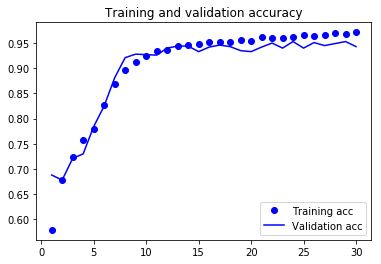

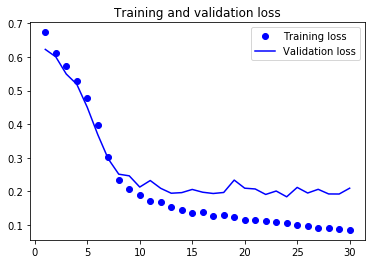

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluate performance on test dataset

In [50]:
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_generator = eval_datagen.flow_from_directory(
        test_dir,target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
eval_generator.reset()    
pred = model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")

Found 1000 images belonging to 2 classes.
1000/1000 [==============================] - 27s 27ms/step
Predictions finished


In [51]:
#View confusion matrix
import numpy
y_pred = numpy.rint(predictions)
y_true = eval_generator.classes
print (confusion_matrix(y_true, y_pred))

TypeError: ufunc 'rint' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Confusion Matrix

In [52]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'

## Visualizing our predictions vs actual results

neg/neg1500.jpg


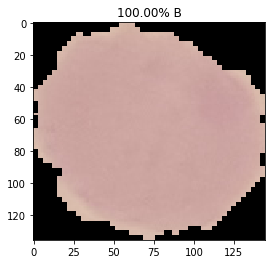

neg/neg1501.jpg


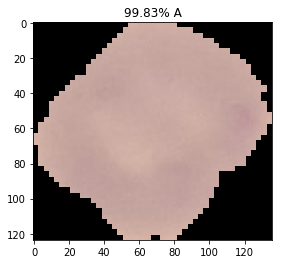

neg/neg1502.jpg


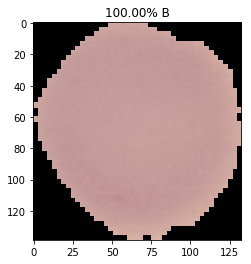

neg/neg1503.jpg


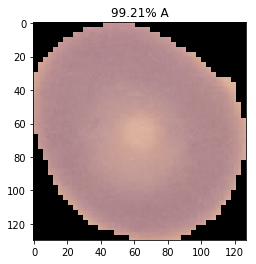

neg/neg1504.jpg


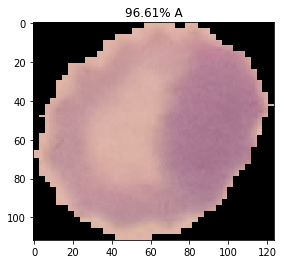

neg/neg1505.jpg


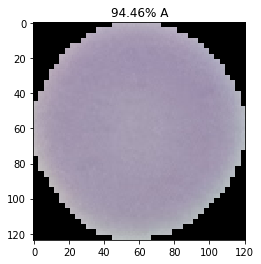

neg/neg1506.jpg


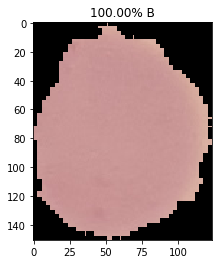

neg/neg1507.jpg


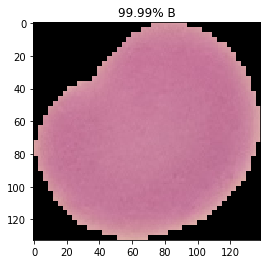

neg/neg1508.jpg


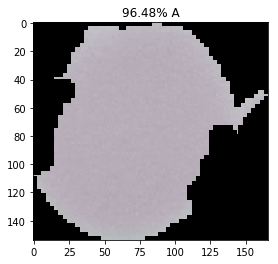

neg/neg1509.jpg


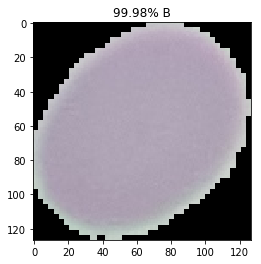

neg/neg1510.jpg


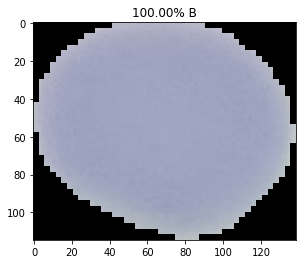

neg/neg1511.jpg


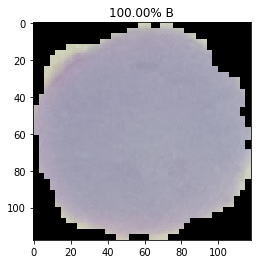

neg/neg1512.jpg


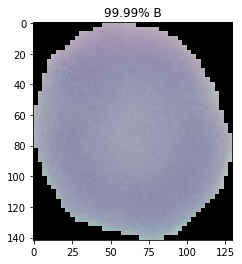

neg/neg1513.jpg


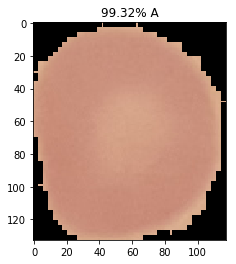

neg/neg1514.jpg


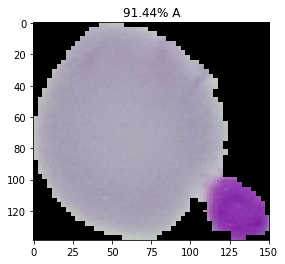

neg/neg1515.jpg


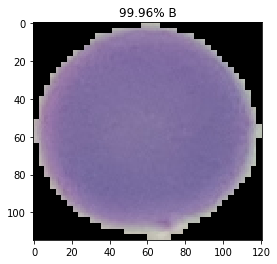

neg/neg1516.jpg


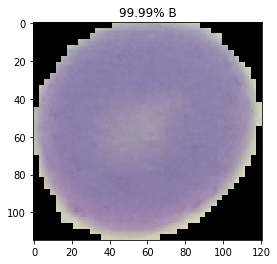

neg/neg1517.jpg


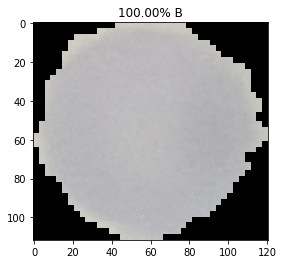

neg/neg1518.jpg


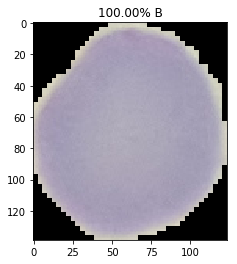

neg/neg1519.jpg


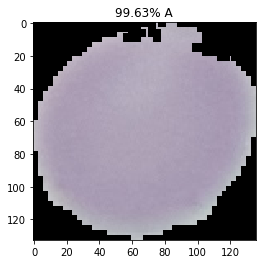

neg/neg1520.jpg


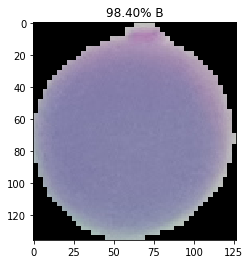

neg/neg1521.jpg


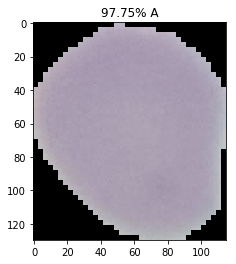

neg/neg1522.jpg


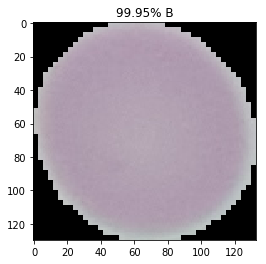

neg/neg1523.jpg


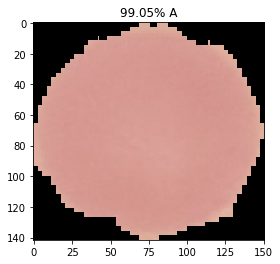

neg/neg1524.jpg


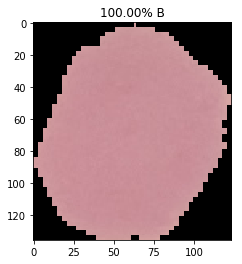

neg/neg1525.jpg


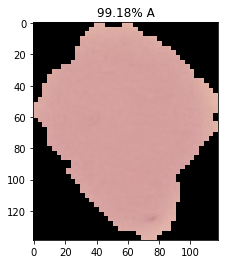

neg/neg1526.jpg


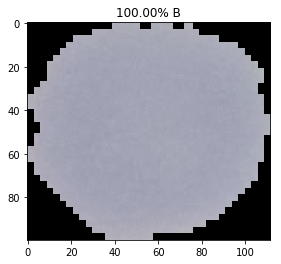

neg/neg1527.jpg


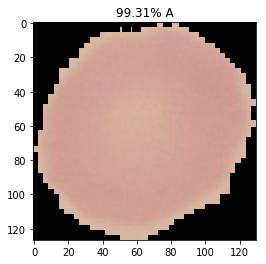

neg/neg1528.jpg


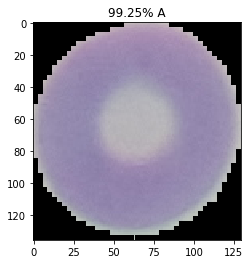

neg/neg1529.jpg


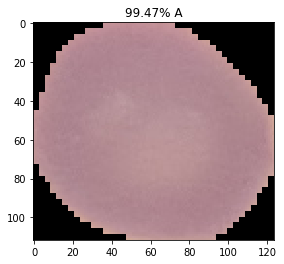

neg/neg1530.jpg


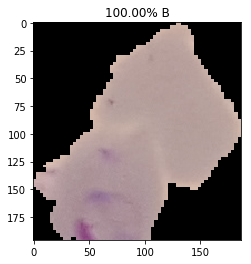

neg/neg1531.jpg


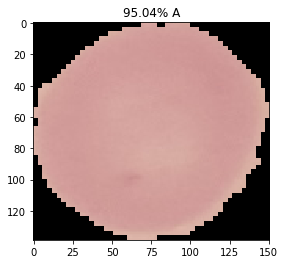

neg/neg1532.jpg


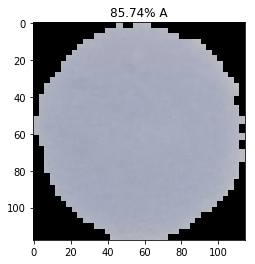

neg/neg1533.jpg


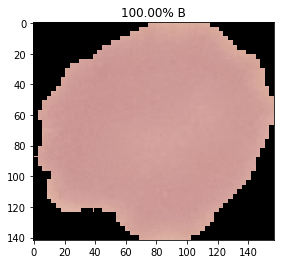

neg/neg1534.jpg


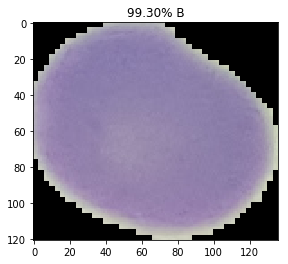

neg/neg1535.jpg


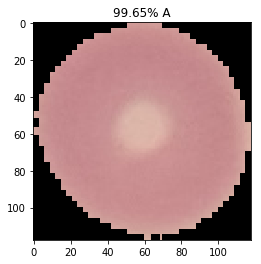

neg/neg1536.jpg


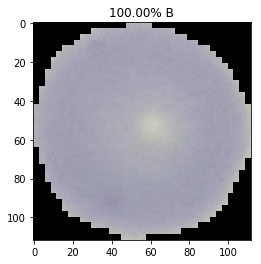

neg/neg1537.jpg


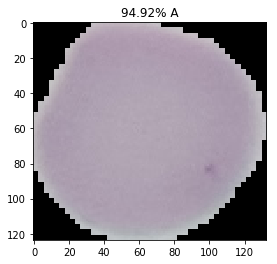

neg/neg1538.jpg


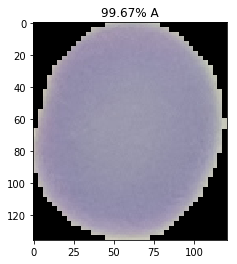

neg/neg1539.jpg


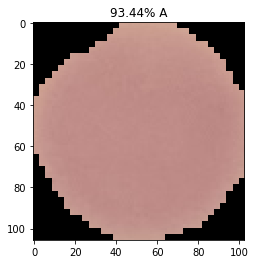

neg/neg1540.jpg


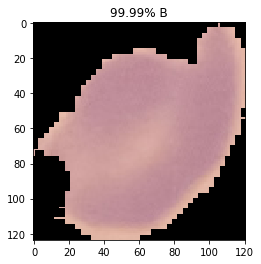

neg/neg1541.jpg


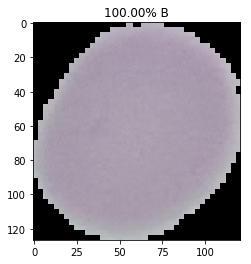

neg/neg1542.jpg


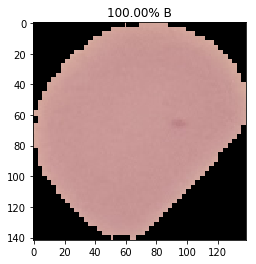

neg/neg1543.jpg


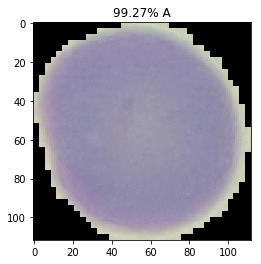

neg/neg1544.jpg


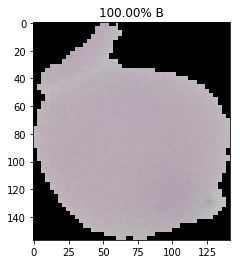

neg/neg1545.jpg


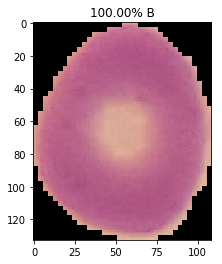

neg/neg1546.jpg


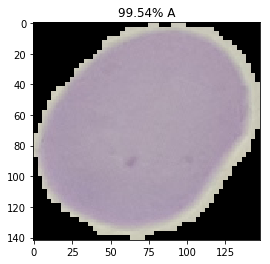

neg/neg1547.jpg


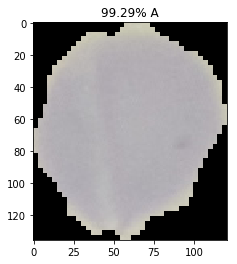

neg/neg1548.jpg


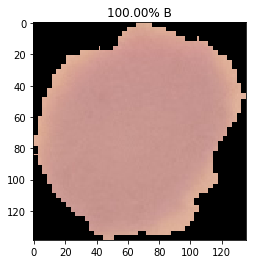

neg/neg1549.jpg


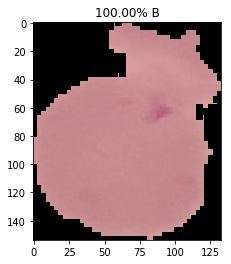

neg/neg1550.jpg


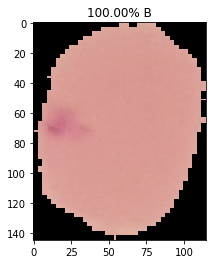

neg/neg1551.jpg


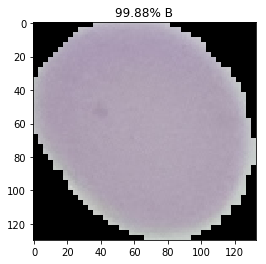

neg/neg1552.jpg


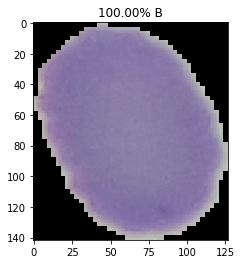

neg/neg1553.jpg


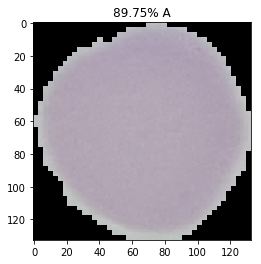

neg/neg1554.jpg


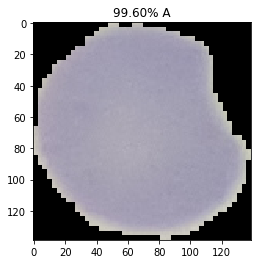

neg/neg1555.jpg


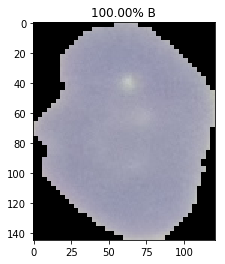

neg/neg1556.jpg


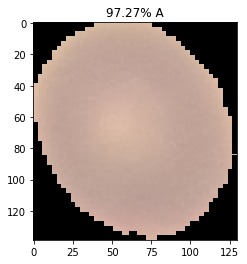

neg/neg1557.jpg


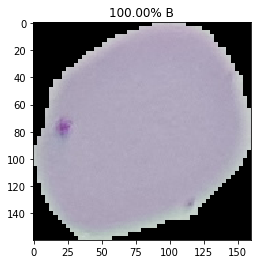

neg/neg1558.jpg


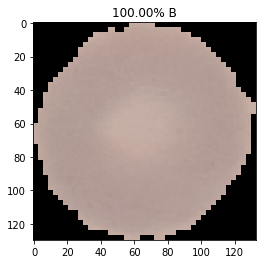

neg/neg1559.jpg


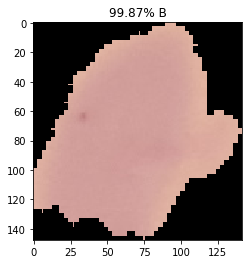

neg/neg1560.jpg


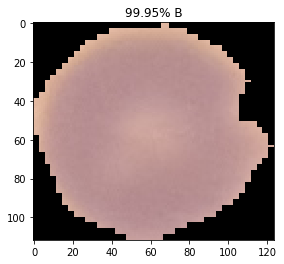

neg/neg1561.jpg


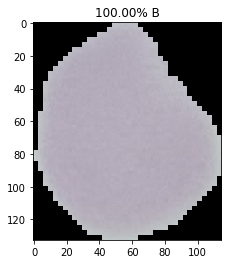

neg/neg1562.jpg


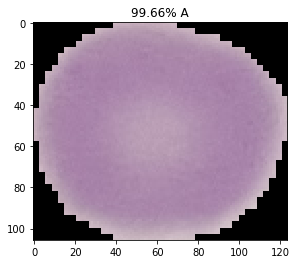

neg/neg1563.jpg


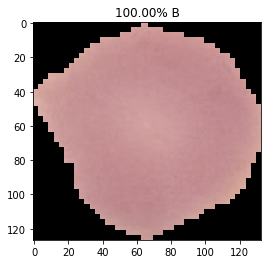

neg/neg1564.jpg


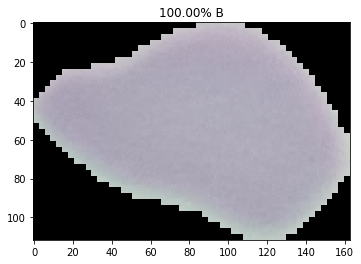

neg/neg1565.jpg


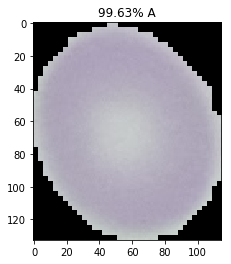

neg/neg1566.jpg


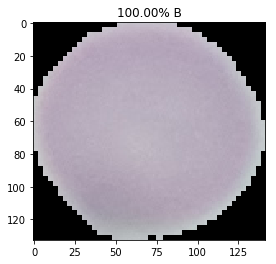

neg/neg1567.jpg


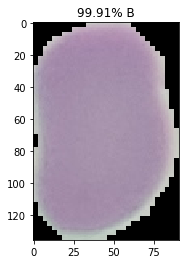

neg/neg1568.jpg


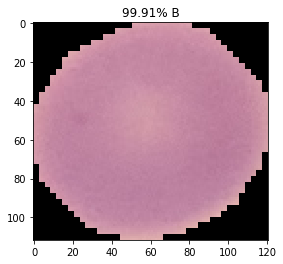

neg/neg1569.jpg


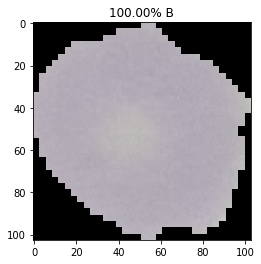

neg/neg1570.jpg


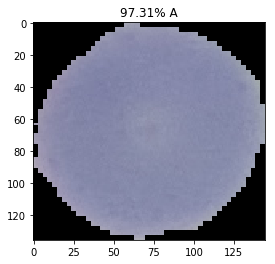

neg/neg1571.jpg


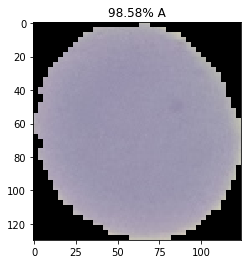

neg/neg1572.jpg


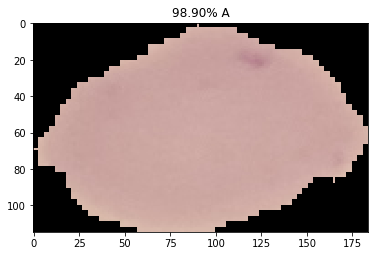

neg/neg1573.jpg


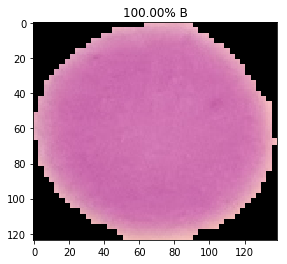

neg/neg1574.jpg


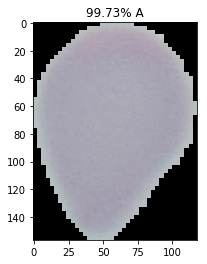

neg/neg1575.jpg


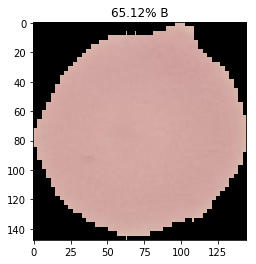

neg/neg1576.jpg


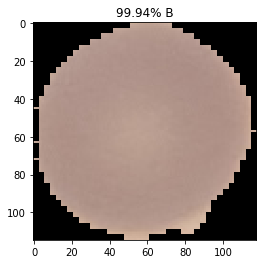

neg/neg1577.jpg


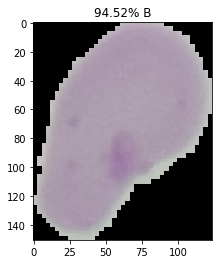

neg/neg1578.jpg


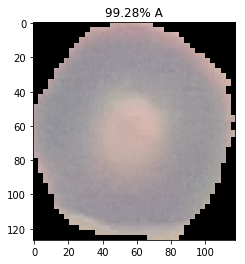

neg/neg1579.jpg


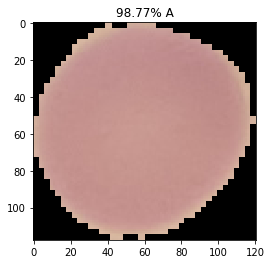

neg/neg1580.jpg


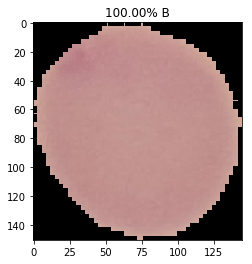

neg/neg1581.jpg


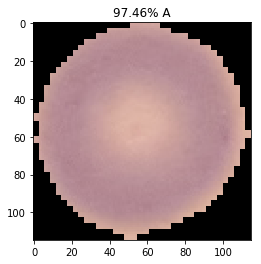

neg/neg1582.jpg


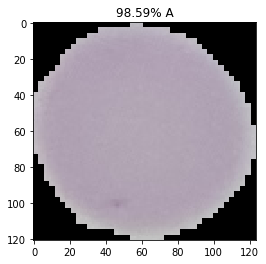

neg/neg1583.jpg


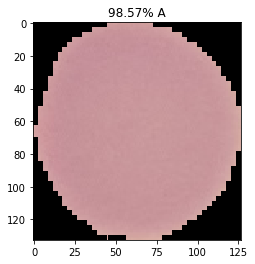

neg/neg1584.jpg


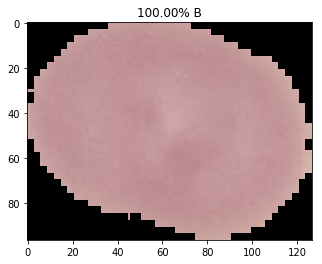

neg/neg1585.jpg


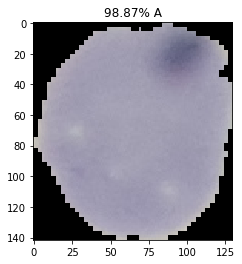

neg/neg1586.jpg


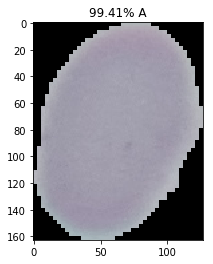

neg/neg1587.jpg


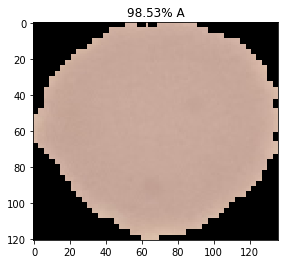

neg/neg1588.jpg


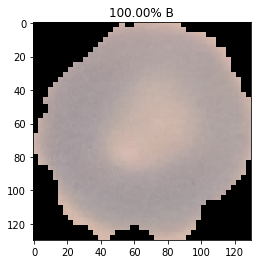

neg/neg1589.jpg


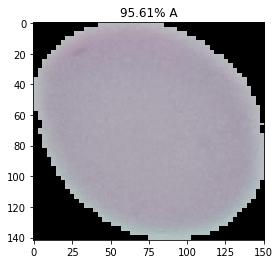

neg/neg1590.jpg


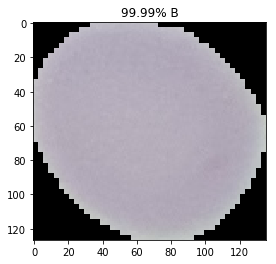

neg/neg1591.jpg


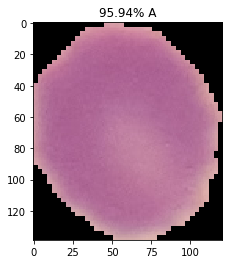

neg/neg1592.jpg


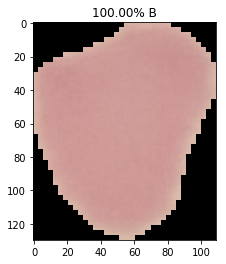

neg/neg1593.jpg


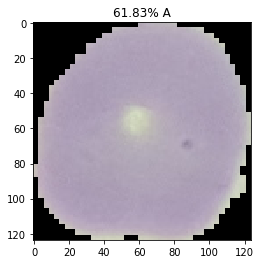

neg/neg1594.jpg


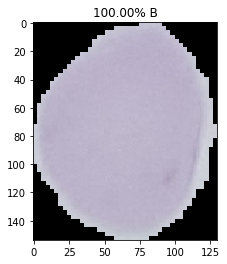

neg/neg1595.jpg


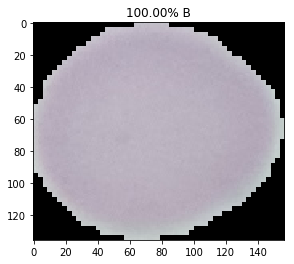

neg/neg1596.jpg


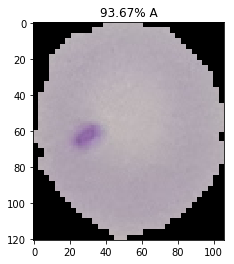

neg/neg1597.jpg


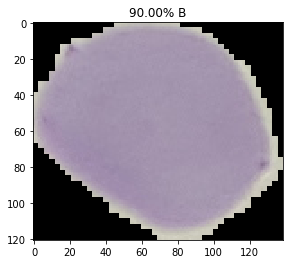

neg/neg1598.jpg


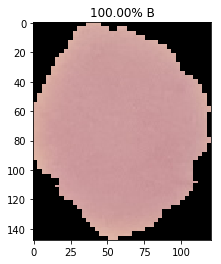

neg/neg1599.jpg


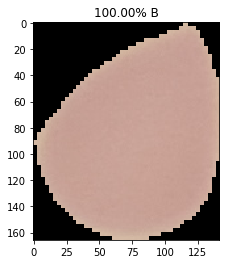

neg/neg1600.jpg


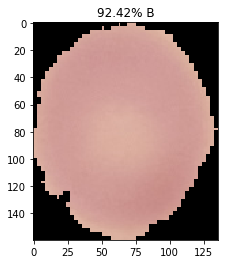

neg/neg1601.jpg


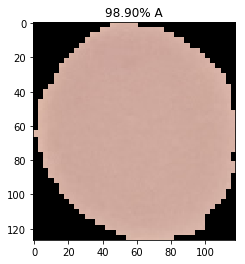

neg/neg1602.jpg


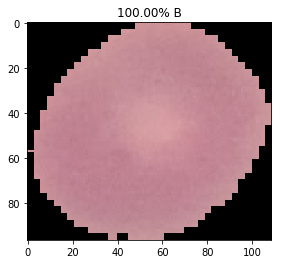

neg/neg1603.jpg


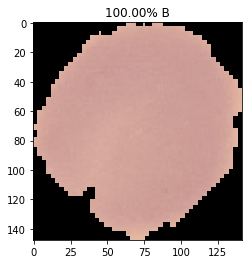

neg/neg1604.jpg


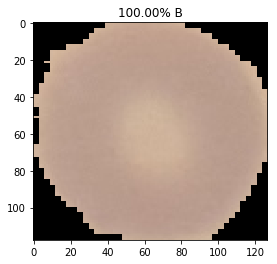

neg/neg1605.jpg


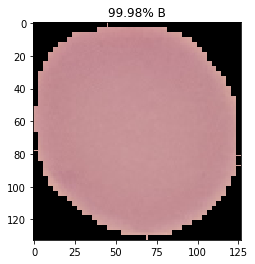

neg/neg1606.jpg


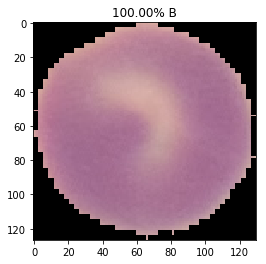

neg/neg1607.jpg


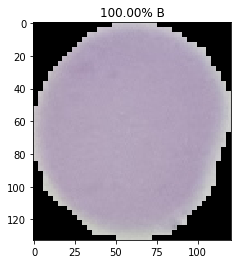

neg/neg1608.jpg


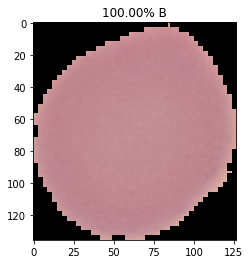

neg/neg1609.jpg


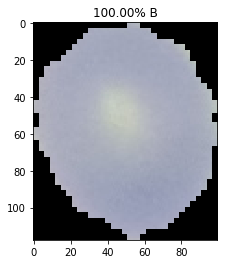

neg/neg1610.jpg


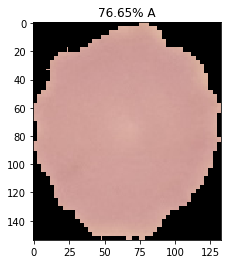

neg/neg1611.jpg


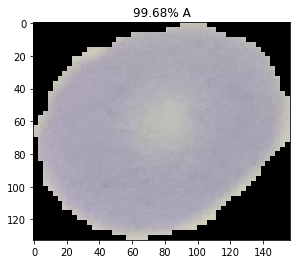

neg/neg1612.jpg


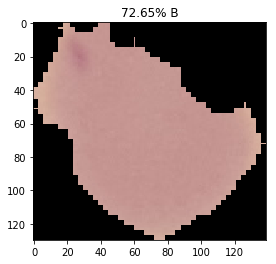

neg/neg1613.jpg


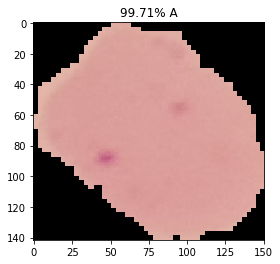

neg/neg1614.jpg


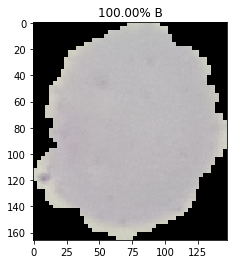

neg/neg1615.jpg


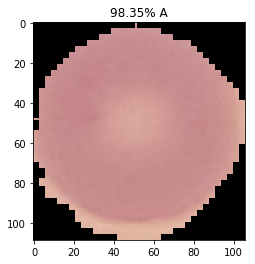

neg/neg1616.jpg


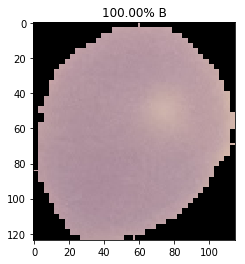

neg/neg1617.jpg


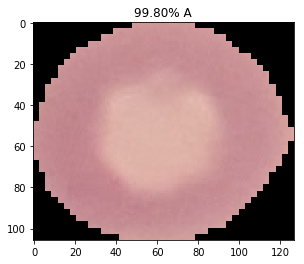

neg/neg1618.jpg


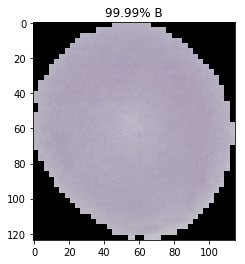

neg/neg1619.jpg


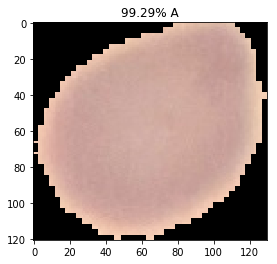

neg/neg1620.jpg


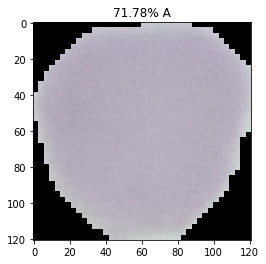

neg/neg1621.jpg


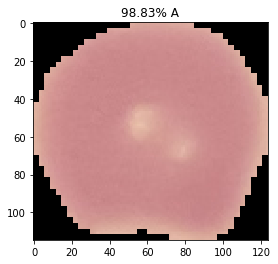

neg/neg1622.jpg


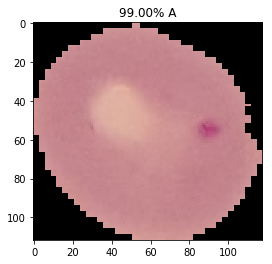

neg/neg1623.jpg


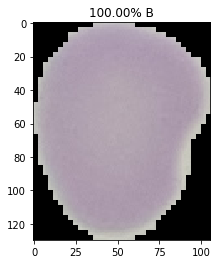

neg/neg1624.jpg


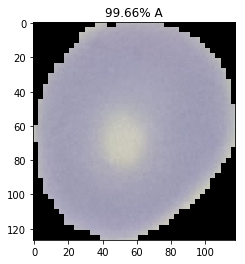

neg/neg1625.jpg


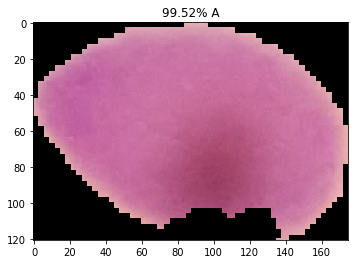

neg/neg1626.jpg


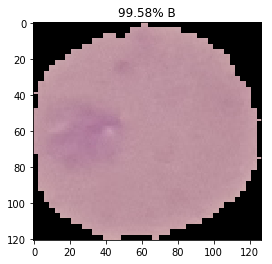

neg/neg1627.jpg


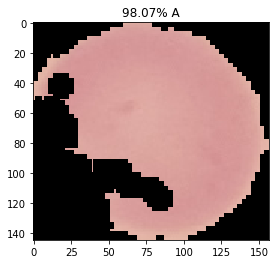

neg/neg1628.jpg


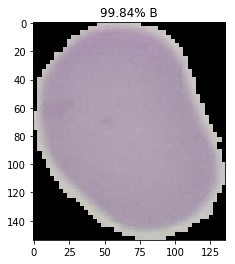

neg/neg1629.jpg


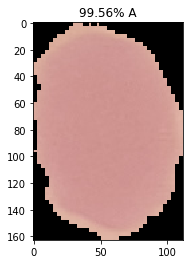

neg/neg1630.jpg


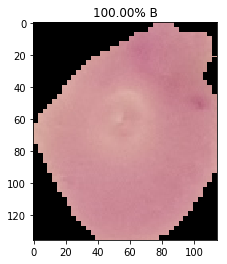

neg/neg1631.jpg


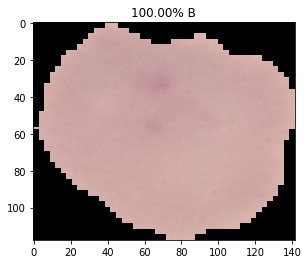

neg/neg1632.jpg


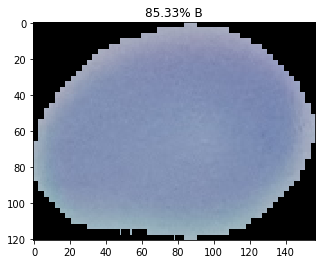

neg/neg1633.jpg


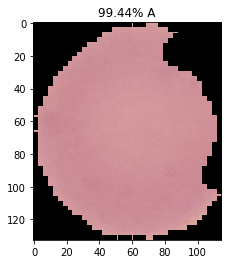

neg/neg1634.jpg


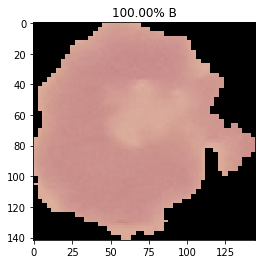

neg/neg1635.jpg


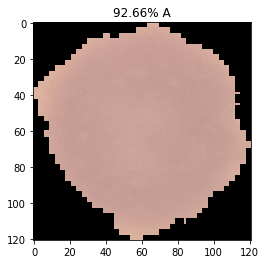

neg/neg1636.jpg


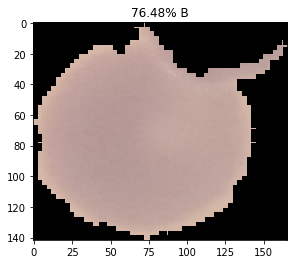

neg/neg1637.jpg


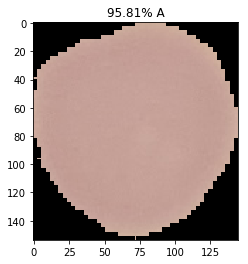

neg/neg1638.jpg


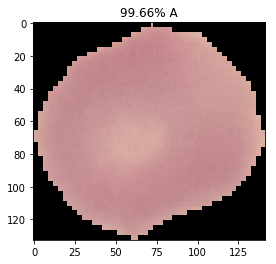

neg/neg1639.jpg


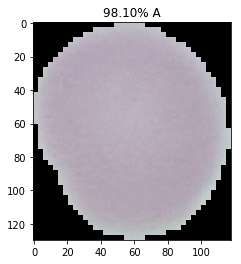

neg/neg1640.jpg


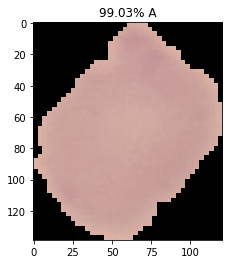

neg/neg1641.jpg


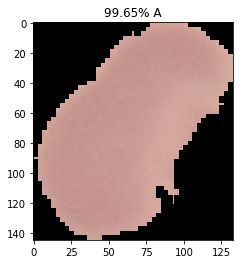

neg/neg1642.jpg


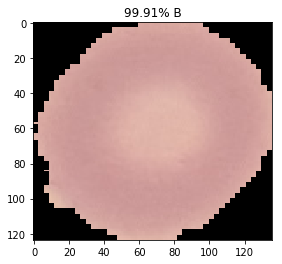

neg/neg1643.jpg


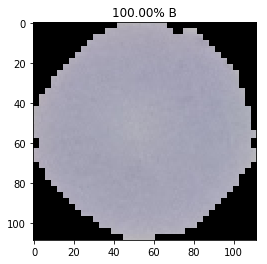

neg/neg1644.jpg


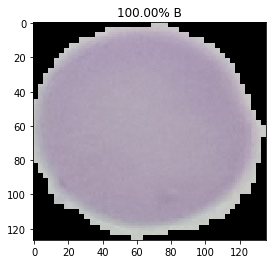

neg/neg1645.jpg


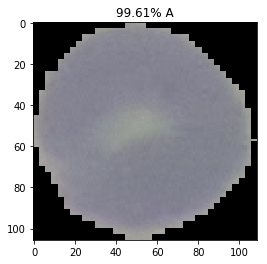

neg/neg1646.jpg


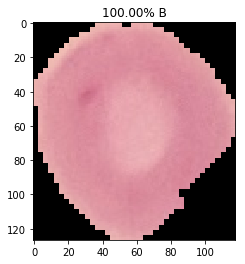

neg/neg1647.jpg


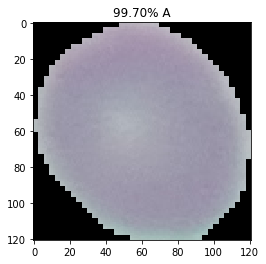

neg/neg1648.jpg


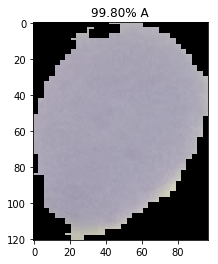

neg/neg1649.jpg


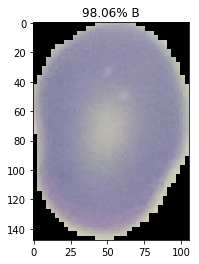

neg/neg1650.jpg


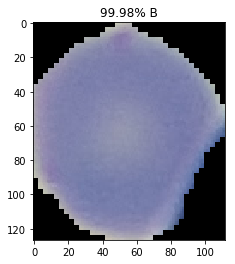

neg/neg1651.jpg


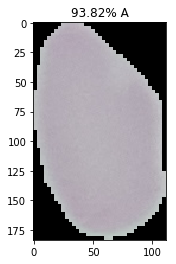

neg/neg1652.jpg


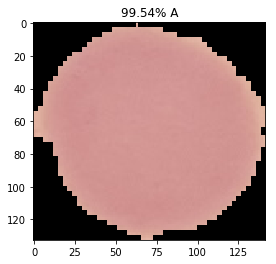

neg/neg1653.jpg


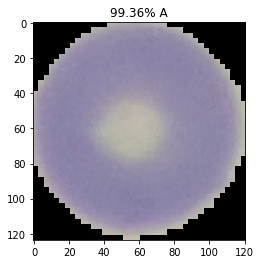

neg/neg1654.jpg


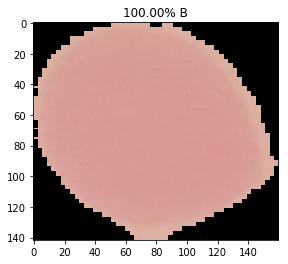

neg/neg1655.jpg


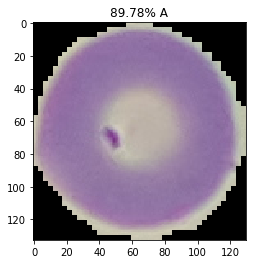

neg/neg1656.jpg


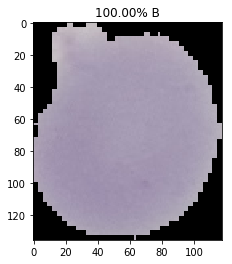

neg/neg1657.jpg


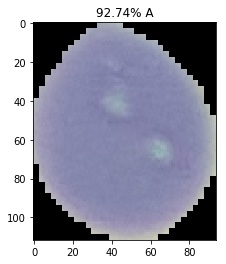

neg/neg1658.jpg


KeyboardInterrupt: 

In [58]:
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = test_dir + "/" +eval_generator.filenames[index]
    img = mpimg.imread(image_path)
    
    plt.imshow(img)
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% B")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% A")
    plt.show()